In [1]:
import sys
sys.path.append('../')
sys.path.append('../src/models/yolov7')

import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [2]:
from src.common.dataset_config import DATASETS_METADATA_PATH

In [3]:
chv_ds_path = '../data/chv'
chv_ds_annots_path = os.path.join(chv_ds_path, 'annotations')
chv_ds_images_path = os.path.join(chv_ds_path, 'images')

# 1. Dataset

In [4]:
images_names = os.listdir(chv_ds_images_path)

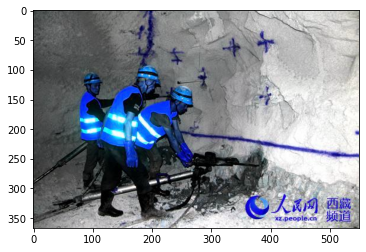

In [5]:
n = 0
img_p = os.path.join(chv_ds_images_path, images_names[n])
img_array = cv2.imread(img_p)
plt.imshow(img_array)

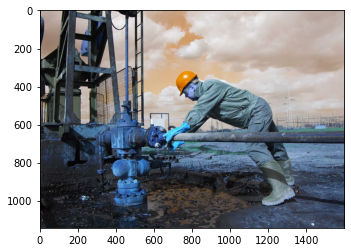

In [6]:
n = 1
img_p = os.path.join(chv_ds_images_path, images_names[n])
img_array = cv2.imread(img_p)
plt.imshow(img_array)

In [10]:
s = '''
image_sizes = {'height': [], 'width': []}
for img_n in tqdm(images_names):
    img_p = os.path.join(chv_ds_images_path, img_n)
    h, w, _ = cv2.imread(img_p).shape
    image_sizes['height'].append(h)
    image_sizes['width'].append(w)
'''

In [11]:
s = '''
image_dims = ['height', 'width']
for img_dim in image_dims:
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.hist(image_sizes[img_dim])
    ax.set_title(img_dim, fontsize=16)
    plt.show()

    dim_mean = np.mean(image_sizes[img_dim])
    dim_median = np.median(image_sizes[img_dim])
    print(f'mean: {round(dim_mean, 3)}\nmedian: {round(dim_median, 3)}')
'''

# 2. Train Yolo

In [9]:
from src.models.yolov7 import train